<a href="https://colab.research.google.com/github/ru2zi/Section2_project/blob/main/SECTION2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

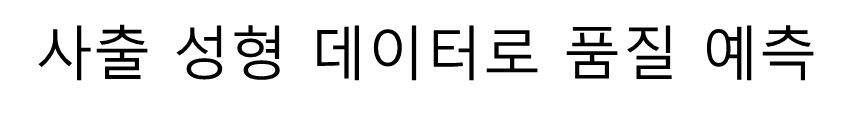

분석 목적: 사출 공정에서 발생하는 품질 문제를 해결

사출성형이란?  <br>
플라스틱 성형법 중의 한 방법으로서,열가소성 수지를 가열해서 유동 상태로 되었을 때 금형의 공동부(cavity)에 가압 주입하여 금형 내에 냉각시킴으로써, 금형의 공동부에 상당하는 성형품을 만드는 방법

사출 성형 과정 <br>
1. 충전단계: 사출기의 스크류가 전진함에 따라 처음에는 금형의 cavity 내로 수지가 유입되는 단계 <br>
2. 가압단계: 스크류가 더욱 전진하여 금형의 cavity에 압력이 가해지는 단계 <br>
3. 보압단계: 가압 단계 이후에도 스크류는 완전히 정지하지 않고 한동안 천천히 계속해서 전진하는데 이때 약 25%의 체적 변화가 생겨 이를 보상하기 위한 단계

성형품의 품질 저하에 영향을 주는 것 <br>
수지온도, 사출속도와 압력, 균일한 냉각

*제조 데이터 분석을 위한 데이터의 품질 기준은 95%이상의 정교성이 보장되어야함 <br>
데이터의 품질 지수 <br>
- 완전성: 필수항목에 누락 없음
- 유일성: 데이터 항목은 유일해야 하며 중복 x
- 유효성: 데이터 항목은 정해진 데이터 유효범위 및 도메인을 충족
- 일관성: 데이터가 지켜야 할 구조, 값, 표현되는 형태가 일관되게 정의 및 일치
- 정확성: 실제 존재하는 객체의 표현 값이 정확히 반영되어야 한다.

데이터 특징 <br>
정상 샘플과 비정상 샘플들의 label이 존재하여 지도학습 방식으로 훈련 + 정확성 높다. <br>
단 정상 샘플이 비정상 샘플보다 월등히 많기 때문에 데이터 불균형 문제가 빈번하게 발생한다. <br>
따라서 비용함수를 설계하거나 오버샘플링을 진행

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
df = pd.read_csv('/content/drive/MyDrive/AI부트캠프/Section2/3주차/데이터셋/labeled_data.csv', index_col=0)

모데이터는 비식별화된 80만개의 데이터지만 <br> 그 중에서 일부분을 가져와 가공일자, 제품의 시리얼 넘버, 모든 값들이 0으로 채워져 있는 등 <br> 불필요한 열들을 제거하여 총 26개의 변수만 남겨둔 데이터 셋이다.

In [ ]:
df.head()

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.shape

In [ ]:
df.nunique()

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
df = df.drop(['TimeStamp','EQUIP_CD','Mold_Temperature_1','Mold_Temperature_2','Mold_Temperature_5',	'Mold_Temperature_6',	'Mold_Temperature_7',	'Mold_Temperature_8',
              'Mold_Temperature_9',	'Mold_Temperature_10','Mold_Temperature_11','Mold_Temperature_12', 'PART_FACT_PLAN_DATE','PART_FACT_SERIAL','Reason'], axis = 'columns')

In [ ]:
df.describe()

In [ ]:
#Switch_Over_Position, Barrel_Temperature_7

In [ ]:
#z-score를 통해 이상치 파악

def z_outlier(data):
  threshold = 3
  
  mean = np.mean(data)
  std = np.std(data)

  z_score = [(y-mean) / std for y in data]

  masks = np.where(np.abs(z_score) > threshold)

  return masks


In [ ]:
outliers = z_outlier(df['Switch_Over_Position'])[0]
print(len(outliers))
outliers

In [ ]:
idxs = df['Switch_Over_Position'].index.values

In [ ]:
idxs

In [ ]:
result = []

for idx in idxs:

  if idx in outliers:
    result.append(True)
  else:
    result.append(False)
      

In [ ]:
len(result)

In [ ]:
np.sum(result)

In [ ]:
df = df.drop(outliers)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.shape

In [ ]:
df['PassOrFail'].value_counts(normalize = True)

In [ ]:
df['PassOrFail'].value_counts()

In [ ]:
df['EQUIP_NAME'].value_counts()

In [ ]:
df_650톤_우진_2호기 = df.query("EQUIP_NAME == '650톤-우진2호기'")

In [ ]:
df_650톤_우진_2호기['PART_NAME'].value_counts(normalize = True)

In [ ]:
df_650톤_우진_2호기['PART_NAME'].unique()

In [ ]:
pip install category_encoders

In [ ]:
def product(data, product_name):
  product = data['PART_NAME'] == product_name
  data = data[product]

  return data

In [ ]:
CN7_RH = product(df, "CN7 W/S SIDE MLD'G RH")

In [ ]:
CN7_LH = product(df, "CN7 W/S SIDE MLD'G LH")

In [ ]:
CN7 = pd.concat([CN7_RH, CN7_LH], ignore_index = True)

In [ ]:
CN7.describe()

In [ ]:
CN7 = CN7.drop(['Barrel_Temperature_7','Switch_Over_Position'],	 axis = 'columns')

In [ ]:
CN7['PassOrFail'] = CN7['PassOrFail'].replace('Y',0).replace('N',1)

In [ ]:
CN7['PassOrFail'].value_counts()

In [ ]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(use_cat_names = True)
CN7_ = encoder.fit_transform(CN7)

In [ ]:
CN7_

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline

from category_encoders import OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from xgboost import XGBClassifier


In [ ]:
target = 'PassOrFail'
features = CN7_.drop(columns=[target]).columns

In [ ]:
def prep_data(df):
  X = df[features]
  y = df[target]
  return X,y

In [ ]:
CN7_X, CN7_y = prep_data(CN7_)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(CN7_X, CN7_y, test_size=0.4, random_state=2)
print(X_train.shape, X_test.shape)

***기준모델 만들기***

In [ ]:
# mode(): Return the highest frequency value in a Series.
result = y_train.mode()[0]

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
basic_model = [result] * len(y_train)

In [ ]:
from sklearn.metrics import *

In [ ]:
# 기준모델의 정확도
print("training accuracy: ", accuracy_score(y_train, basic_model))

train데이터 **오버샘플링**

In [ ]:
! pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# transform the dataset
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X_train,list(y_train))

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(X_resampled.shape))

In [ ]:
# target(Price)와 가장 correlated 된 features 를 k개 고르기.
## f_regresison, SelectKBest 불러오기.
from sklearn.feature_selection import f_regression, SelectKBest
## selctor 정의하기.
selector = SelectKBest(score_func=f_regression, k=20)
## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_resampled, y_resampled)
## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)
X_train_selected.shape, X_test_selected.shape

In [ ]:
all_names = X_resampled.columns
## selector.get_support()
selected_mask = selector.get_support()
## 선택된 특성(변수)들
selected_names = all_names[selected_mask]
## 선택되지 않은 특성(변수)들
unselected_names = all_names[~selected_mask]
print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

변수선택

In [ ]:
features_21 = ["PART_NAME_CN7 W/S SIDE MLD'G RH", "PART_NAME_CN7 W/S SIDE MLD'G LH",
       'Injection_Time', 'Filling_Time',
       'Cycle_Time', 'Clamp_Close_Time', 'Plasticizing_Position',
       'Max_Injection_Speed', 'Max_Screw_RPM', 'Average_Screw_RPM',
       'Max_Injection_Pressure', 'Max_Switch_Over_Pressure',
       'Max_Back_Pressure', 'Average_Back_Pressure', 'Barrel_Temperature_3',
       'Barrel_Temperature_4', 'Barrel_Temperature_5', 'Barrel_Temperature_6',
       'Hopper_Temperature', 'Mold_Temperature_3', 'Mold_Temperature_4']

In [ ]:
X_train_r = X_resampled[features_21]

In [ ]:
y_train_r = y_resampled

In [ ]:
X_test = X_test[features_21]
X_test.shape

In [ ]:
from sklearn.metrics import *
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

불량품(1)인데 정품(0)이라고 하면 소비자에게 마이너스라 더 위험, 정밀도 중요

1.xg분류 알고리즘

In [ ]:
xg_clf = XGBClassifier()

xg_clf.fit(X_train_r,y_train_r)

In [ ]:
y_pred = xg_clf.predict(X_test)
pred_proba_xg = xg_clf.predict_proba(X_test)[:,1].reshape(-1,1)
get_clf_eval(y_test, y_pred, pred_proba_xg)

In [ ]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from xgboost import XGBClassifier

pipe = make_pipeline(
    OrdinalEncoder(),
   XGBClassifier(booster='gbtree', 
                    colsample_bylevel=0.9, 
                    colsample_bytree=0.8, 
                    gamma=0, 
                    max_depth=8, 
                    min_child_weight=3, 
                    n_estimators=50, 
                    nthread=4, 
                    objective='binary:logistic', 
                    random_state=2, 
                    silent= True)


)

pipe.fit(X_train_r, y_train_r);

In [ ]:
y_pred = pipe.predict(X_test)
pred_proba_pipe = pipe.predict_proba(X_test)[:,1].reshape(-1,1)
get_clf_eval(y_test, y_pred, pred_proba_pipe)

In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
thresholds = [0.4, 0.42, 0.44, 0.46, 0.48, 0.50, 0.52]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [ ]:
get_eval_by_threshold(y_test, pred_proba_pipe, thresholds)

In [ ]:
pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

pipe.named_steps

In [ ]:
permuter = PermutationImportance(
    pipe.named_steps['xgbclassifier'],
    scoring='accuracy', 
    n_iter=5,
    random_state=2
)

In [ ]:
X_test_transformed = pipe.named_steps['ordinalencoder'].transform(X_test)

permuter.fit(X_test_transformed, y_test);

In [ ]:
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=features_21
)


In [ ]:
from sklearn.metrics import *

2. 로지스틱회귀곡선

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Ir_clf = LogisticRegression(solver='liblinear')
Ir_clf.fit(X_train_r,y_train_r)
y_pred2 = Ir_clf.predict(X_test)
pred_proba_Ir = Ir_clf.predict_proba(X_test)[:,1].reshape(-1,1)
get_clf_eval(y_test, y_pred3, pred_proba_Ir)

In [ ]:
get_eval_by_threshold(y_test, pred_proba_Ir, thresholds)

3. 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_r,y_train_r)
y_pred2 = rf_clf.predict(X_test)

pred_proba_rf = rf_clf.predict_proba(X_test)[:,1].reshape(-1,1)
get_clf_eval(y_test, y_pred2, pred_proba_rf)

In [ ]:
get_eval_by_threshold(y_test, pred_proba_rf, thresholds)

In [ ]:
import seaborn as sns

In [ ]:
 from matplotlib import pyplot as plt

In [ ]:
# 파이프라인 구축
pipe_10 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=0, max_depth=100, oob_score=True, n_estimators = 10)
)
print("n_estimators = 10 일때")

# 모델 학습 및 정확도 측정
pipe_10.fit(X_train_r,y_train_r)
y_pred10 = pipe_10.predict(X_test)

pred_proba_rf_10 = pipe_10.predict_proba(X_test)[:,1].reshape(-1,1)
get_clf_eval(y_test, y_pred10, pred_proba_rf_10)

# 확률값 분포
y_pred_proba_10 = pipe_10.predict_proba(X_test)[:, 1]
sns.displot(y_pred_proba_10)
plt.title("predict_proba")
plt.show()

In [ ]:
# 파이프라인 구축
pipe_100 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=0, max_depth=100, oob_score=True, n_estimators = 100)
)
print("n_estimators = 100 일때")

# 모델 학습 및 정확도 측정
pipe_100.fit(X_train_r,y_train_r)
y_pred100 = pipe_100.predict(X_test)

pred_proba_rf_100 = pipe_100.predict_proba(X_test)[:,1].reshape(-1,1)
get_clf_eval(y_test, y_pred100, pred_proba_rf_100)

# 확률값 분포
y_pred_proba_100 = pipe_100.predict_proba(X_test)[:, 1]
sns.displot(y_pred_proba_100)
plt.title("predict_proba")
plt.show()

In [ ]:
# 파이프라인 구축
pipe_1000 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=0, max_depth=100, oob_score=True, n_estimators = 1000)
)
print("n_estimators = 1000 일때")

# 모델 학습 및 정확도 측정
pipe_1000.fit(X_train_r,y_train_r)
y_pred100 = pipe_1000.predict(X_test)

pred_proba_rf_1000 = pipe_1000.predict_proba(X_test)[:,1].reshape(-1,1)
get_clf_eval(y_test, y_pred100, pred_proba_rf_1000)

# 확률값 분포
y_pred_proba_1000 = pipe_1000.predict_proba(X_test)[:, 1]
sns.displot(y_pred_proba_1000)
plt.title("predict_proba")
plt.show()

In [ ]:
from scipy.stats import randint, uniform
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import RandomizedSearchCV



pipe_rf = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier()
)

dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    'targetencoder__min_samples_leaf': randint(1, 10),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [10, 50, 100, 200, 300, 500, 1000, None], 
    'randomforestclassifier__max_features': ['auto', 'sqrt','log2', None] # max_features
}

clf_rf_ = RandomizedSearchCV(
    pipe_rf, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)




In [ ]:
clf_rf_ .get_params().keys()


In [ ]:

clf_rf_.fit(X_train_r,y_train_r);

print('최적 하이퍼파라미터: ', clf_rf_.best_params_)
print('MAE: ', -clf_rf_.best_score_)


In [ ]:
pipe_rrf = make_pipeline(
    TargetEncoder(min_samples_leaf = 3, smoothing = 2.0), 
    SimpleImputer(strategy = 'median'), 
    RandomForestClassifier(max_depth = 50,
                           max_features = 'auto',
                           n_estimators = 164))

pipe_rrf.fit(X_train_r,y_train_r)
y_pred3 = pipe_rrf.predict(X_test)

pred_proba_rrf = pipe_rrf.predict_proba(X_test)[:,1].reshape(-1,1)
get_clf_eval(y_test, y_pred3, pred_proba_rrf)

In [ ]:
permuter2 = PermutationImportance(
    pipe_rrf,
    scoring='accuracy', 
    n_iter=5,
    random_state=2
)
permuter2.fit(X_test, y_test)

In [ ]:
eli5.show_weights(
    permuter2, 
    top=None, 
    feature_names=features_21
)


In [ ]:
! pip install pdpbox

In [ ]:
! pip install shap

In [ ]:
# 1개의 특성만을 사용하여 그래프를 그려보기
from pdpbox.pdp import pdp_isolate, pdp_plot
from sklearn.metrics import r2_score

# 1. 	Clamp_Close_Time 
feature = 'Clamp_Close_Time'

# PDP plots
isolated = pdp_isolate(
    model=pipe_rrf, 
    dataset=X_train_r, 
    model_features=X_train_r.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

In [ ]:
# 2. 	Plasticizing_Position
feature = 'Plasticizing_Position'

# PDP plots
isolated = pdp_isolate(
    model=pipe_rrf, 
    dataset=X_train_r, 
    model_features=X_train_r.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

In [ ]:
# 2. 	Mold_Temperature_4
feature = 'Mold_Temperature_4'

# PDP plots
isolated = pdp_isolate(
    model=pipe_rrf, 
    dataset=X_train_r, 
    model_features=X_train_r.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

In [ ]:
import shap

explainer = shap.Explainer(pipe_rrf.predict, X_train_r)
shap_values = explainer.shap_values(X_train_r)

shap.summary_plot(shap_values, X_train_r, plot_type='bar')

In [ ]:
#추가모델실험

In [ ]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': randint(1, 100),
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': randint(1, 10),
               'min_samples_split': randint(1, 10),
               'n_estimators': randint(50, 500)}

clf = RandomForestClassifier()
random = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
random.fit(X_train_r,y_train_r)

random_pf = random.best_estimator_.predict(X_test)
random_acc = accuracy_score(y_test,random_pf)

print(random.best_params_)
print(random_acc)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
grid = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
grid.fit(X_train_r,y_train_r)

grid_pf = grid.best_estimator_.predict(X_test)
grid_acc = accuracy_score(y_test,grid_pf)

print(grid.best_params_)
print(grid_acc)